# Carregar bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

# Ler dataset

**survival**: Survival (0 = No, 1 = Yes) <br>
**pclass:** Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) <br>
**sex:** Sex	
**Age:** Age in years	
**sibsp**: # of siblings / spouses aboard the Titanic	
**parch:** # of parents / children aboard the Titanic	
**ticket:** Ticket number	
**fare:** Passenger fare	
**cabin:** Cabin number	
**embarked:** Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

***

#### Additional Info:
**pclass:** A proxy for socio-economic status (SES)<br>
1st = Upper<br>
2nd = Middle<br>
3rd = Lower

**age:** Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp:** The dataset defines family relations in this way...<br>
Sibling = brother, sister, stepbrother, stepsister<br>
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch:** The dataset defines family relations in this way...<br>
Parent = mother, father<br>
Child = daughter, son, stepdaughter, stepson<br>
Some children travelled only with a nanny, therefore parch=0 for them.

In [2]:
dataset = pd.read_csv('train.csv')

# O identificador do passageiro não é uma variável útil para a análise
dataset.drop(['PassengerId'], axis=1, inplace=True)

In [3]:
dataset.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dataset.shape

(891, 11)

In [5]:
dataset.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

# Descrever estatísticamente as variáveis quantitativas

In [6]:
dataset.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Verificar porcentagem de valores nulos por feature

In [7]:
(dataset.isnull().sum()/dataset.shape[0])*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Existem features com 3 valores nulos, um tratamento posterior deve ser necessário. É importante observar que a variável "Cabin" possui quase 80% de valores nulos.

# Separar variáveis quantitativas e qualitativas para análise
Obs: As variáveis "Name", "Ticket" e "Cabin" serão analisadas posteriormente

In [8]:
quantitivas_analisar = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
qualitativas_analisar = ['Sex', 'Embarked']

# Visualizar a distribuição das variáveis "Sex" e "Embarked"

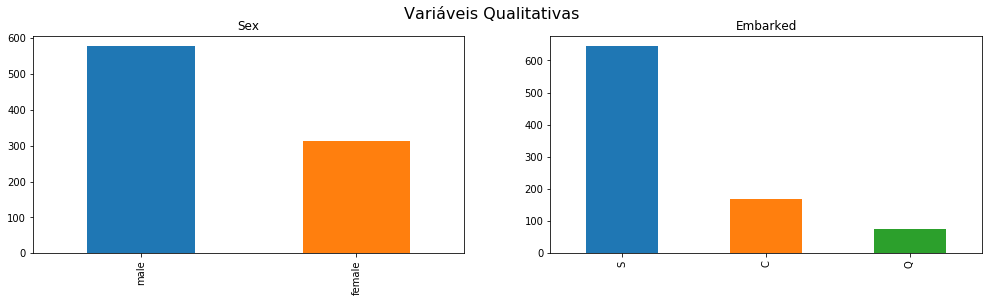

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=len(qualitativas_analisar))
fig.set_size_inches(17, 4)

plt.suptitle('Variáveis Qualitativas', fontsize=16)
for i in range(0, len(qualitativas_analisar)):
    feature = qualitativas_analisar[i]
    ax[i].set_title(feature)
    dataset[feature].value_counts().plot(kind='bar', ax=ax[i])

# Visualizar os histogramas das variáveis quantiativas

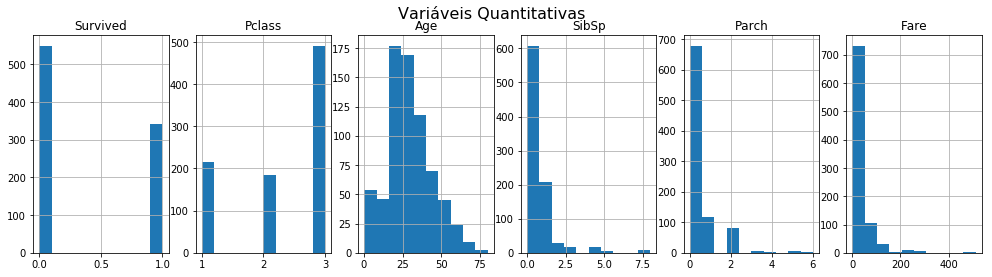

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=len(quantitivas_analisar))
fig.set_size_inches(17, 4)

plt.suptitle('Variáveis Quantitativas', fontsize=16)
for i in range(0, len(quantitivas_analisar)):
    feature = quantitivas_analisar[i]
    ax[i].set_title(feature)
    dataset[feature].hist(ax=ax[i])

# Visualizar os box plots das variáveis quantiativas

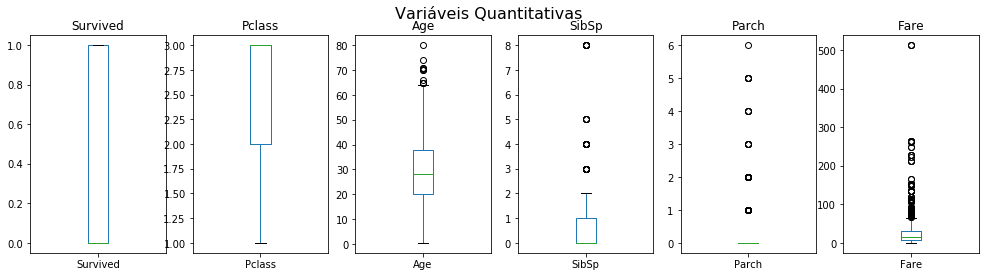

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=len(quantitivas_analisar))
fig.set_size_inches(17, 4)

plt.suptitle('Variáveis Quantitativas', fontsize=16)
for i in range(0, len(quantitivas_analisar)):
    feature = quantitivas_analisar[i]
    ax[i].set_title(feature)
    dataset[feature].plot(kind='box', ax=ax[i])

Observando os box plots podemos perceber a presença de outliers para algumas das variáveis. Esses valores anômalos afetam o desempenho da predição e podem precisar de tratamento especial.

# Visualizar correlações entre as  variáveis quantiativas

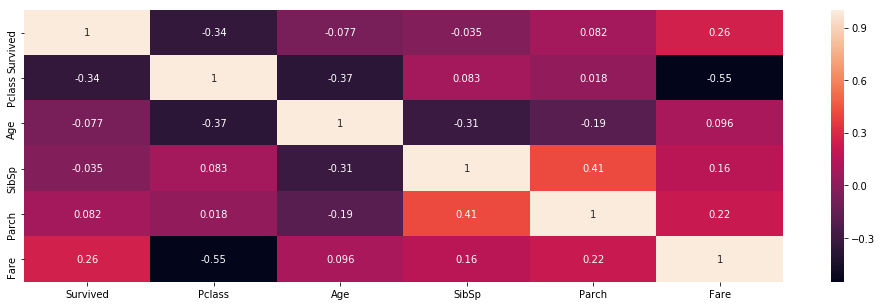

In [12]:
fig = plt.figure()
fig.set_size_inches(17, 5)

sns.heatmap(dataset[quantitivas_analisar].corr(), annot=True)

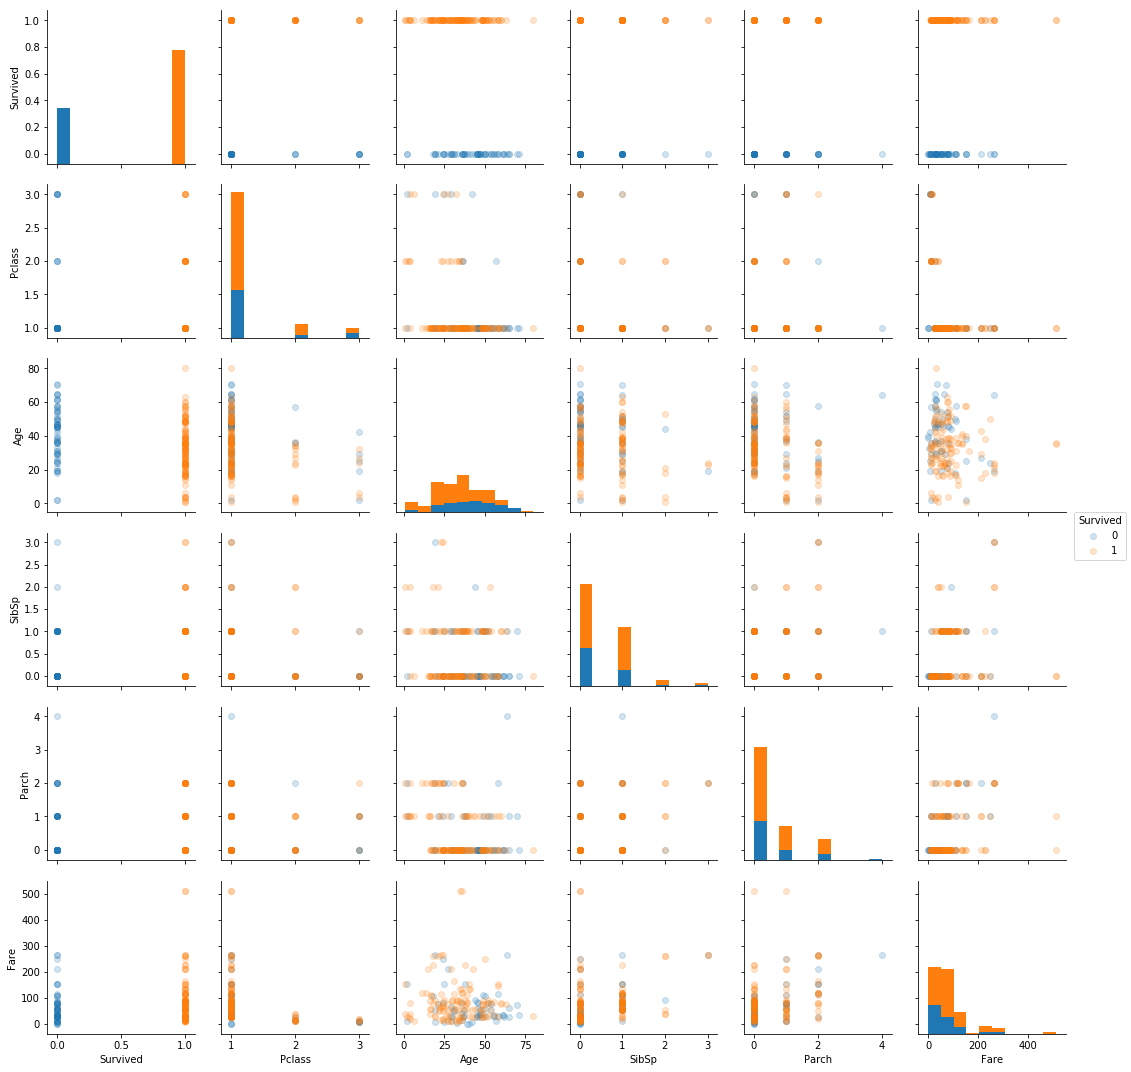

In [22]:
sns.pairplot(dataset.dropna(), kind='reg', hue='Survived', plot_kws={'scatter_kws': {'alpha': 0.2}, 'fit_reg': False})

# Checar Hipóteses

### Mulheres tiveram maior chance de sobreviver em relação aos homens;

In [79]:
totalHomens = dataset.loc[dataset['Sex'] == 'male', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'male', 'Survived'].value_counts() / totalHomens) * 100

0    0.811092
1    0.188908
Name: Survived, dtype: float64

In [82]:
totalMulheres = dataset.loc[dataset['Sex'] == 'female', 'Survived'].count()
(dataset.loc[dataset['Sex'] == 'female', 'Survived'].value_counts() / totalMulheres) * 100

1    74.203822
0    25.796178
Name: Survived, dtype: float64

<span style="color: green">A hipotese foi confirmada. Enquanto 81% dos homens morreram no desastre, apenas 25% das mulheres também morreram.</span>

### Crianças tiveram maior chance de sobreviver em relação aos adultos;
Considerando crianças como passageiros de até 16 anos, temos:

In [83]:
totalCriancas = dataset.loc[dataset['Age'] < 17, 'Survived'].count()
(dataset.loc[dataset['Age'] < 17, 'Survived'].value_counts() / totalCriancas) * 100

1    55.0
0    45.0
Name: Survived, dtype: float64

In [84]:
totalAdultos = dataset.loc[dataset['Age'] > 17, 'Survived'].count()
(dataset.loc[dataset['Age'] > 17, 'Survived'].value_counts() / totalAdultos) * 100

0    61.896839
1    38.103161
Name: Survived, dtype: float64

<span style="color: green">A hipótese também foi confirmada. Enquanto 55% das crianças conseguiram se salvar, apenas 38% dos adultos tiveram a mesma sorte.</span>

### Meninas (mulher e criança) foram priorizados em relação aos meninos (homem e criança);

In [87]:
totalMeninas = dataset.loc[((dataset['Age'] < 17) & (dataset['Sex'] == 'female')), 'Survived'].count()
(dataset.loc[((dataset['Age'] < 17) & (dataset['Sex'] == 'female')), 'Survived'].value_counts() / totalMeninas) * 100

1    67.346939
0    32.653061
Name: Survived, dtype: float64

In [88]:
totalMeninos = dataset.loc[((dataset['Age'] < 17) & (dataset['Sex'] == 'male')), 'Survived'].count()
(dataset.loc[((dataset['Age'] < 17) & (dataset['Sex'] == 'male')), 'Survived'].value_counts() / totalMeninos) * 100

0    56.862745
1    43.137255
Name: Survived, dtype: float64

<span style="color: green">Curiosamente a hipótese foi confirmada. Percentualmente, mais meninas se salvaram do que meninos.</span>

### Se os passageiros da terceira classe puderam sentir o impacto mais claramente, eles tiveram mais êxito em se salvar;

In [94]:
total3classe = dataset.loc[dataset['Pclass'] == 3, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 3, 'Survived'].value_counts() / total3classe) * 100

0    75.763747
1    24.236253
Name: Survived, dtype: float64

In [98]:
totalNao3classe = dataset.loc[dataset['Pclass'] != 3, 'Survived'].count()
(dataset.loc[dataset['Pclass'] != 3, 'Survived'].value_counts() / totalNao3classe) * 100

1    55.75
0    44.25
Name: Survived, dtype: float64

<span style="color: red">A hipótese foi refutada. Enquanto na primeira e segunda classe 55% dos passageiros conseguiram sobreviver, apenas 24% também conseguiram na terceira classe.</p>

### Passageiros com maior poder econômico ou social foram realmente beneficiados; 

In [112]:
total1classe = dataset.loc[dataset['Pclass'] == 1, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 1, 'Survived'].value_counts() / total1classe) * 100

1    62.962963
0    37.037037
Name: Survived, dtype: float64

In [115]:
total2classe = dataset.loc[dataset['Pclass'] == 2, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 2, 'Survived'].value_counts() / total2classe) * 100

0    52.717391
1    47.282609
Name: Survived, dtype: float64

In [116]:
total3classe = dataset.loc[dataset['Pclass'] == 3, 'Survived'].count()
(dataset.loc[dataset['Pclass'] == 3, 'Survived'].value_counts() / total3classe) * 100

0    75.763747
1    24.236253
Name: Survived, dtype: float64

<span style="color: green">Realmente. Na primeira classe, 62% sobreviveram, na segunda 47% e na terceira apenas 24% </span>

### A cidade de embarque não está relacionada com a probabilidade de óbito;

In [108]:
totalS = dataset.loc[dataset['Embarked'] == 'S', 'Survived'].count()
(dataset.loc[dataset['Embarked'] == 'S', 'Survived'].value_counts() / totalS) * 100

0    66.304348
1    33.695652
Name: Survived, dtype: float64

In [109]:
totalC = dataset.loc[dataset['Embarked'] == 'C', 'Survived'].count()
(dataset.loc[dataset['Embarked'] == 'C', 'Survived'].value_counts() / totalC) * 100

1    55.357143
0    44.642857
Name: Survived, dtype: float64

In [110]:
totalQ = dataset.loc[dataset['Embarked'] == 'Q', 'Survived'].count()
(dataset.loc[dataset['Embarked'] == 'Q', 'Survived'].value_counts() / totalQ) * 100

0    61.038961
1    38.961039
Name: Survived, dtype: float64

<span style="color: olive">Parece que sim. Os passageiros da cidade 'C' (Cherbourg-Octeville) sobreviveram com um maior percentual em relação as outras cidades. Entretanto isso pode ter sido devido ao acaso. </span>

### A cabine em que o passageiro estava hospedado influenciou na sobrevivência;

Considerando a baixa qualidade dessa variável, onde apenas 23% dos registros contém dados, não é possível concluir algo em relação a essa hipótese

### Hipóteses impossíveis de serem verificadas: 
Os dados não permitem que essas hipóteses sejam verificadas

- Tripulantes tiveram prioridade em relação aos passageiros¹;
- Entre os tripulantes, aqueles de de alto escalão tiveram maior probabilidade de sobreviver¹;
- Empregados (criados) de pessoas de alto poder aquisitivo hospedados na primeira classe foram beneficiados¹;
- Usar ou não apelido não influencia em algo¹;
- A nacionalidade não influencia na probabilidade de sobrevivência
- O passageiro ter se hidratado (alcoólica ou não) aumenta a chance de sobrevivência
- Pessoas feridas têm maior probabilidade de óbito;

¹ Essa informação futuramente talvez possa ser extraída por meio de técnicas de Mineração de Texto no nome dos passageiros